<a href="https://colab.research.google.com/github/SamarHamdy/Train.csv/blob/main/FinalProj_Samar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import missingno as msno
%matplotlib inline


In [6]:
filename='/content/LoanExport.csv'
Loan_data= pd.read_csv(filename)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [37]:
type(Loan_data)

pandas.core.frame.DataFrame

In [38]:
print(Loan_data.shape)

(231809, 28)


In [39]:
print(Loan_data.columns)

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'Channel', 'PPM', 'ProductType', 'PropertyState',
       'PropertyType', 'PostalCode', 'LoanSeqNum', 'LoanPurpose',
       'OrigLoanTerm', 'NumBorrowers', 'SellerName', 'ServicerName',
       'EverDelinquent', 'MonthsDelinquent', 'MonthsInRepayment'],
      dtype='object')


In [40]:
Loan_data.dtypes

CreditScore             int64
FirstPaymentDate        int64
FirstTimeHomebuyer     object
MaturityDate            int64
MSA                    object
MIP                     int64
Units                   int64
Occupancy              object
OCLTV                   int64
DTI                     int64
OrigUPB                 int64
LTV                     int64
OrigInterestRate      float64
Channel                object
PPM                    object
ProductType            object
PropertyState          object
PropertyType           object
PostalCode             object
LoanSeqNum             object
LoanPurpose            object
OrigLoanTerm            int64
NumBorrowers           object
SellerName             object
ServicerName           object
EverDelinquent        float64
MonthsDelinquent      float64
MonthsInRepayment     float64
dtype: object

In [41]:
#count data types
Loan_data.dtypes.value_counts()

object     14
int64      10
float64     4
dtype: int64

In [7]:
Loan_data.describe()


,CreditScore,FirstPaymentDate,MaturityDate,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment
count,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000
mean,708.936991,199904.760553,202902.367043,9.216685,1.026022,76.960529,30.033453,124940.387921,76.937986,6.926547,359.835375,0.197848,1.837729,60.805291
std,68.408791,13.821228,16.090508,12.648273,0.202986,15.236154,13.203974,53657.440624,15.225298,0.343541,2.286939,0.398378,8.809392,46.142599
min,0.000000,199901.000000,202402.000000,0.000000,0.000000,0.000000,0.000000,8000.000000,0.000000,4.000000,301.000000,0.000000,0.000000,1.000000
25%,675.000000,199903.000000,202902.000000,0.000000,1.000000,70.000000,22.000000,83000.000000,70.000000,6.750000,360.000000,0.000000,0.000000,34.000000
50%,717.000000,199904.000000,202903.000000,0.000000,1.000000,80.000000,31.000000,117000.000000,80.000000,6.875000,360.000000,0.000000,0.000000,48.000000
75%,753.000000,199905.000000,202904.000000,25.000000,1.000000,90.000000,39.000000,160000.000000,90.000000,7.125000,360.000000,0.000000,0.000000,63.000000
max,849.000000,201303.000000,204302.000000,55.000000,4.000000,110.000000,65.000000,497000.000000,103.000000,12.350000,361.000000,1.000000,180.000000,212.000000


Abbriviations: 

MSA - Marketing Services Agreements

OCLTV - Combined loan-to-value

LTV - Loan to value

PPM - Private Placement Memorandum

Mip% - Mortgag Insurance Percentage / MIP- Mortgage Insurance Premium

OCLTV - Original Combined Loan to Value

DTI - Debt to Income ratio

In [43]:
Loan_data.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0.0,0.0,52.0
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0.0,0.0,144.0
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0.0,0.0,67.0
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0.0,0.0,35.0
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0.0,0.0,54.0


**Borrower Financial Information:** Credit Score, First_Time_Homebuyer_Flag, original debt-to-income (DTI) ratio, number of borrowers, occupancy status (primary residence, investment or second home)

**Loan Information:** First_Payment (date), Maturity_Date, MI_pert (% mortgage insured), original LTV (loan-to-value) ratio, original combined LTV ratio, original interest rate, original unpaid balance, PPM (prepayment penalty mortgage) flag, loan purpose (purchase vs refinance), original loan term, super-conforming flag

**Property information:** number of units, property type (condo, single-family home, etc.)

**Location: **MSA_Code (Metropolitan statistical area), Property_state, postal_code

**Seller/Servicer information:** channel (retail, broker, etc.), seller name, servicer name

In [44]:
Loan_data.tail()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
231804,759,199903,X,202902,20764,0,1,O,75,28,...,8800,F199Q1222421,C,360,2,Ot,Other servicers,1.0,1.0,54.0
231805,759,199903,X,202902,20764,25,1,O,92,0,...,7000,F199Q1263610,P,360,2,Ot,Other servicers,1.0,31.0,194.0
231806,759,199903,X,202902,22744,0,1,O,80,27,...,33300,F199Q1189260,N,360,1,Ot,Other servicers,0.0,0.0,46.0
231807,759,199903,X,202902,23060,0,1,O,66,0,...,46800,F199Q1379081,N,360,2,FI,NATLCITYMTGECO,0.0,0.0,37.0
231808,759,199903,X,202902,23460,0,1,O,65,26,...,35900,F199Q1234660,C,360,2,OL,BANKOFAMERICA,NaN,NaN,NaN


In [46]:
Loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231809 entries, 0 to 231808
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         231809 non-null  int64  
 1   FirstPaymentDate    231809 non-null  int64  
 2   FirstTimeHomebuyer  231809 non-null  object 
 3   MaturityDate        231809 non-null  int64  
 4   MSA                 231809 non-null  object 
 5   MIP                 231809 non-null  int64  
 6   Units               231809 non-null  int64  
 7   Occupancy           231809 non-null  object 
 8   OCLTV               231809 non-null  int64  
 9   DTI                 231809 non-null  int64  
 10  OrigUPB             231809 non-null  int64  
 11  LTV                 231809 non-null  int64  
 12  OrigInterestRate    231809 non-null  float64
 13  Channel             231809 non-null  object 
 14  PPM                 231809 non-null  object 
 15  ProductType         231809 non-nul

Processing Data

In [47]:
#find/count null values
missing_values=Loan_data.isnull().sum()
print(missing_values)

CreditScore               0
FirstPaymentDate          0
FirstTimeHomebuyer        0
MaturityDate              0
MSA                       0
MIP                       0
Units                     0
Occupancy                 0
OCLTV                     0
DTI                       0
OrigUPB                   0
LTV                       0
OrigInterestRate          0
Channel                   0
PPM                       0
ProductType               0
PropertyState             0
PropertyType              0
PostalCode                0
LoanSeqNum                0
LoanPurpose               0
OrigLoanTerm              0
NumBorrowers              0
SellerName            19905
ServicerName              0
EverDelinquent            1
MonthsDelinquent          1
MonthsInRepayment         1
dtype: int64


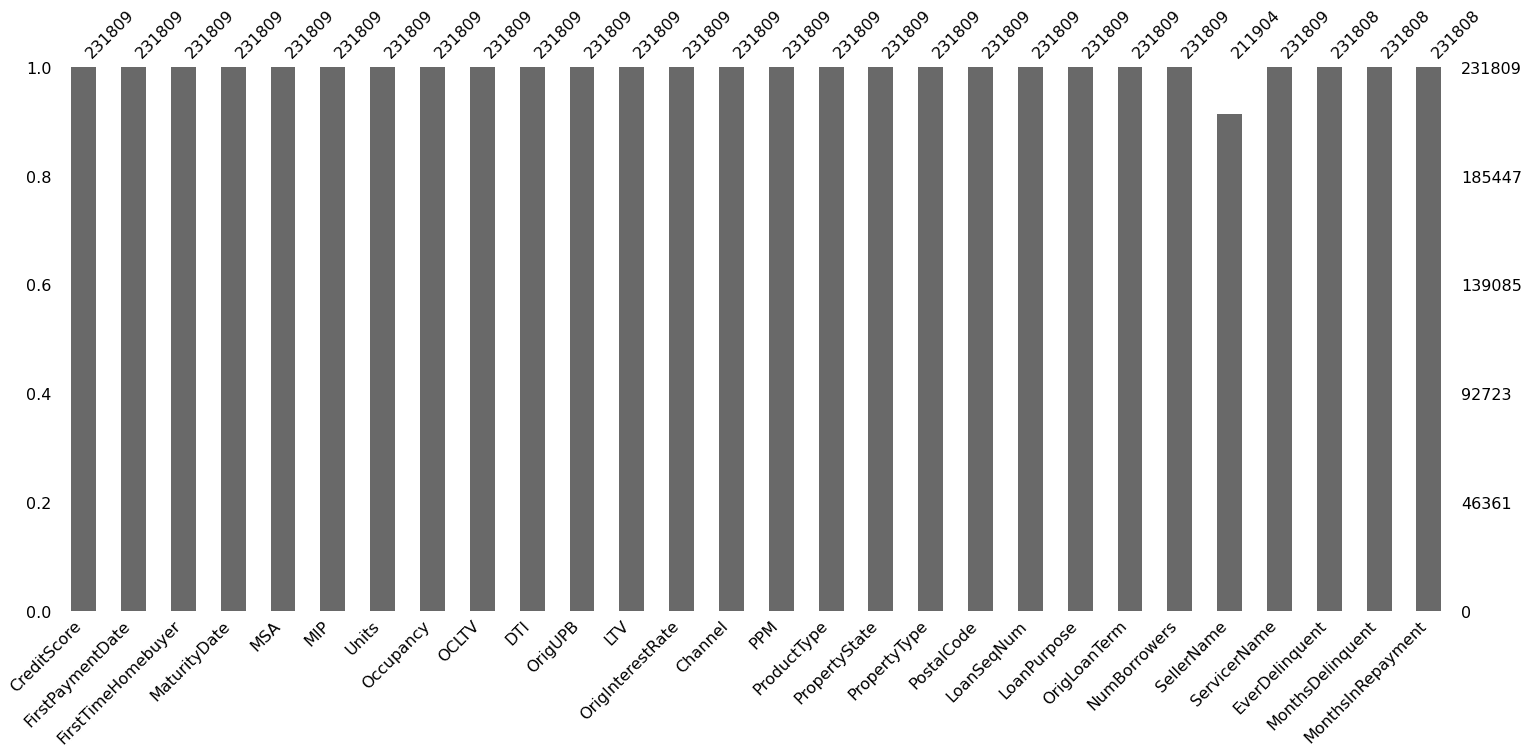

In [49]:
#bar plot showing where is missing values
msno.bar(Loan_data)

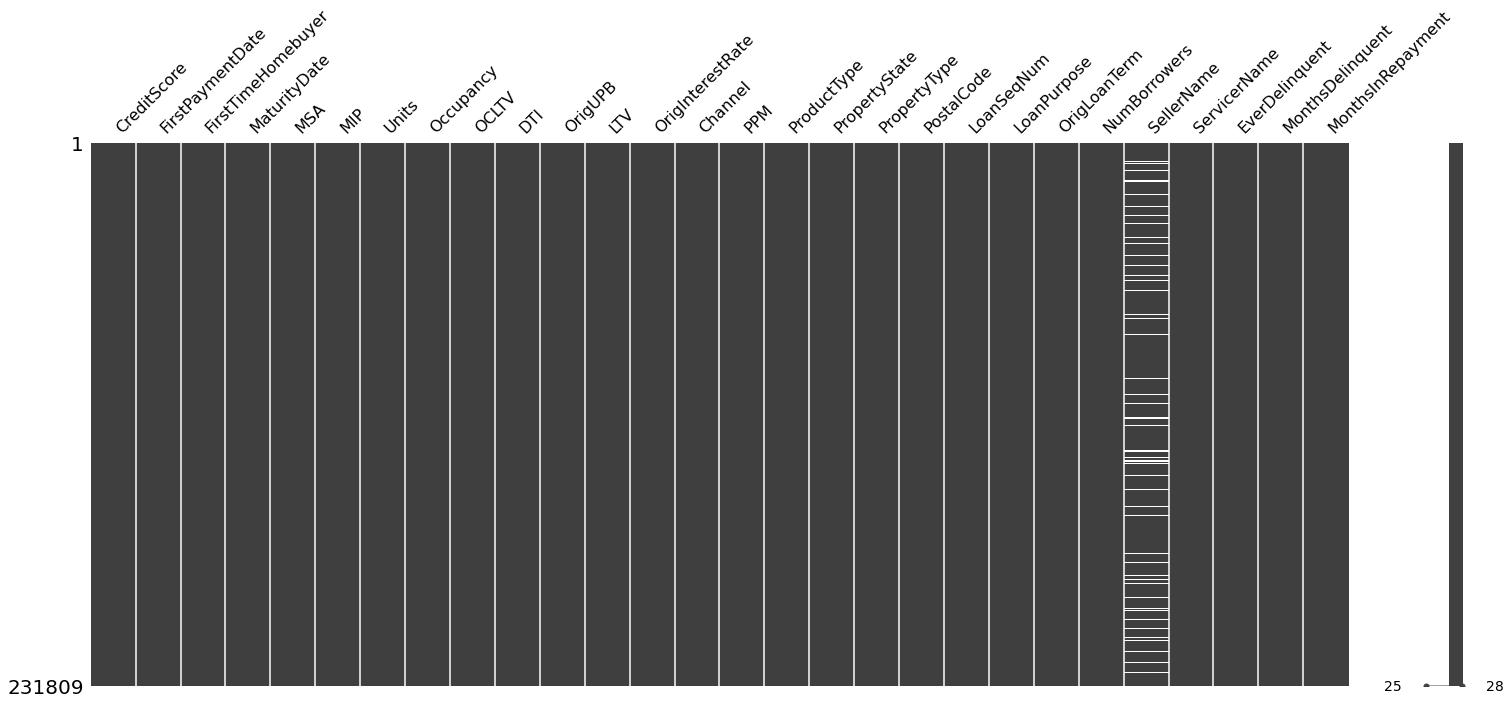

In [50]:
#plot shows position of missing values
msno.matrix(Loan_data)

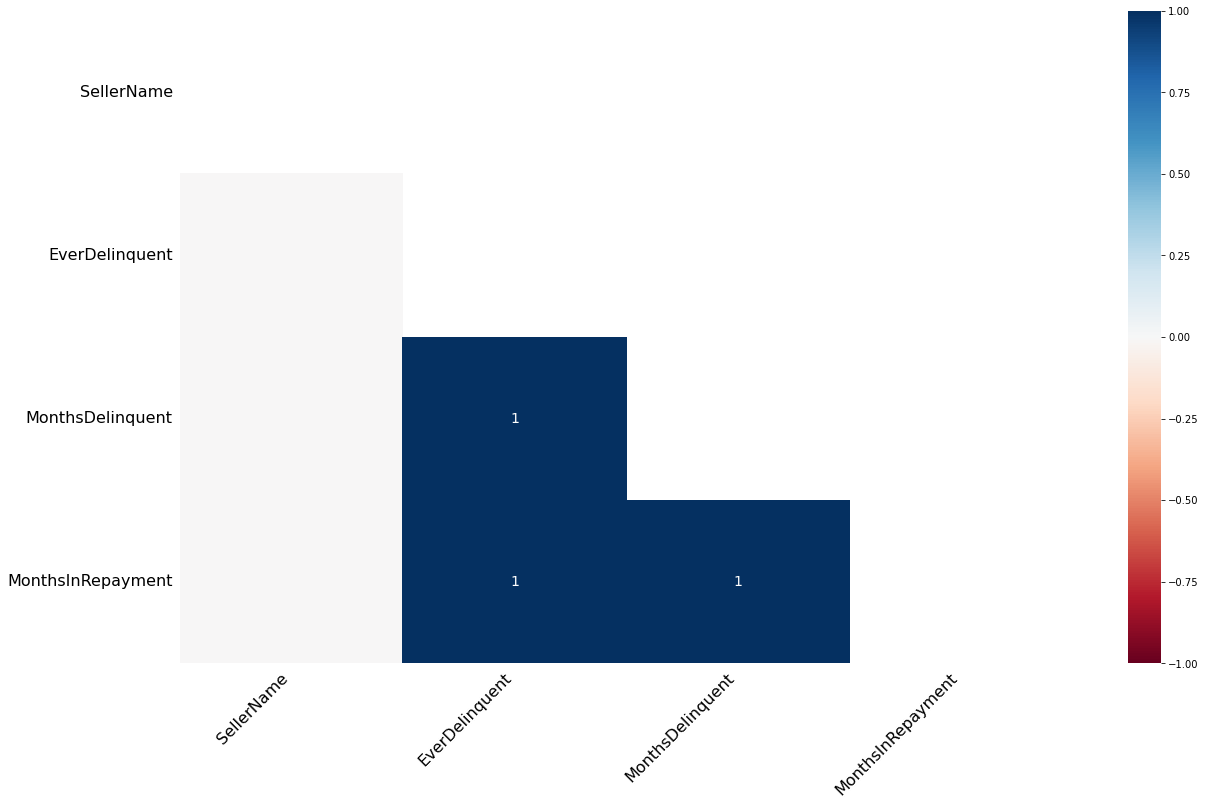

In [52]:
#heatmap shows how miising value is related
msno.heatmap(Loan_data)

In [53]:
#total missing values
total_missing_values= missing_values.sum()
print("total missing values= ", total_missing_values)

#count total cells
total_cells = np.product(Loan_data.shape)
print("total number of cells= ", total_cells)

#percentage of total missing values
total_missing_values_percentage= (total_missing_values/total_cells)*100
print("percent of total missing values= %" ,total_missing_values_percentage)

total missing values=  19908
total number of cells=  6490652
percent of total missing values= % 0.3067180307925922
